In [2]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [3]:
@njit
def trapezoidal(N:int, func:Callable):
    x = np.linspace(0,1,N+1)
    y = func(x)
    intermezzo = (y[:N]+y[1:]).sum()
    return intermezzo/(2*N)

@njit
def box(N,func):
    x = np.linspace(0,1,N+1)
    y = func(x)
    intermezzo = y[:N].sum()
    return intermezzo/N


In [4]:
@njit
def line(x):
    return x

@njit
def square(x):
    return x**2

@njit
def exp(x):
    return np.exp(x)

In [5]:
answer = np.exp(1)-1

In [6]:
N = np.arange(1,11)

In [7]:
trapezoidal_errors = [np.abs(answer-trapezoidal(n, exp)) for n in N]
box_errors = [np.abs(answer-box(n, exp)) for n in N]

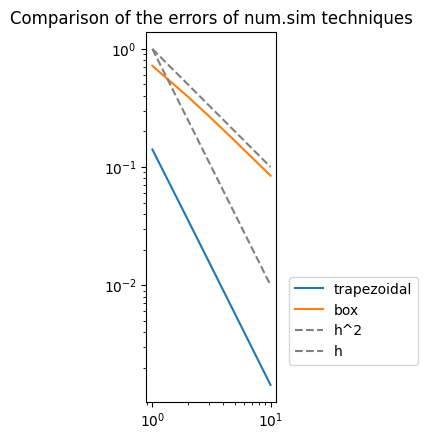

In [8]:
fig, ax = plt.subplots(1,1)

ax.plot(N, trapezoidal_errors, label='trapezoidal')
ax.plot(N, box_errors, label='box')
ax.plot(N,1/N**2, label ='h^2', color ='grey', linestyle ='--')
ax.plot(N,1/N, label ='h', color ='grey', linestyle ='--')

ax.set(xscale='log', yscale='log', 
       aspect=1.0,title='Comparison of the errors of num.sim techniques')
ax.legend( loc=(1.1,0.1))

#EX 1.2

In [9]:
from scipy.stats import linregress
log_err = np.log(trapezoidal_errors)
log_h = np.log(1/N)
slope, intercept, r, p, se = linregress(log_h, log_err)

In [10]:
slope

1.9941461407743433

In [11]:
# The intercept is log(C)=>

C = np.exp(intercept)
C

0.14156741757811922

In [12]:
@njit
def trapezoidal_w_error(N):
    ''' We assume that the error of this method is =Ch^2, C = 0.3762544585491569'''
    global C
    th_err = C*((1/N)**2)
    answer = np.exp(1)-1
    x = np.linspace(0,1,N+1)
    y = exp(x)
    intermezzo = (y[:N]+y[1:]).sum()
    return_val = intermezzo/(2*N)
    err = np.abs(answer-return_val)   

    return return_val, err/th_err 

In [13]:
trapezoidal_ratio_errors = [trapezoidal_w_error(n)[1] for n in N] # The ratio is computed based on the computational error (over) the theoretical


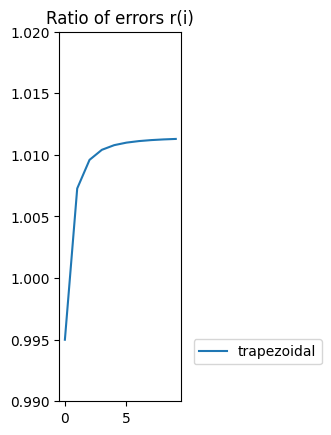

In [27]:
fig, ax = plt.subplots(1,1)

ax.plot( trapezoidal_ratio_errors, label='trapezoidal')

# ax.plot(N,1/N**2, label ='h^2', color ='grey', linestyle ='--')


ax.set( aspect=1000.0,title='Ratio of errors r(i)', ylim=[0.99,1.02])
ax.legend( loc=(1.1,0.1))